In [1]:
import pandas as pd
from datetime import datetime
import re
from pandas import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
'''from shutil import copyfile
copyfile("binance/data/trades/ETHBTC.csv", "binance/data/trades/ETHBTC-Copy.csv")
copyfile("binance/data/orders/ETHBTC.csv", "binance/data/orders/ETHBTC-Copy.csv")'''

'binance/orders/ETHBTC-Copy.csv'

In [2]:
def format_file(f_file, orders):
    with open(f_file, 'r') as file :
        filedata = file.read()
        
        if orders=='yes':
            
            #format the first line suitable for use in Pandas
            filedata = filedata.replace('TimeStamp,[Buy/Sell|Price|Volume]\n',
                                        'TimeStamp|Buy/Sell|Price|Volume\n')             
        
        else:
            #format the first line suitable for use in Pandas
            filedata = filedata.replace('TimeStamp,[ExactTimeStamp|BuyType|Price|ID|Volume]\n',
                                        'TimeStamp|ExactTimeStamp|BuyType|Price|ID|Volume\n') 

    #change the ',' after timestamps to '|' to have same delimiter for all the columns 
    filedata = re.sub('((^[\d]{10})([\,]))', r'\2|', filedata, flags=re.M)

    #add newlines at the end of each datapoint (each ExactTimeStamp)
    filedata = filedata.replace(',', '\n|')

    #write the file out again
    with open(f_file, 'w') as file:
        file.write(filedata)        

In [3]:
file_1 = 'binance/data/orders/ETHBTC-Copy.csv'
file_2 = "binance/data/trades/ETHBTC-Copy.csv"

In [79]:
format_file(file_1, 'yes')

In [6]:
format_file(file_2, 'no')

In [46]:
orders = pd.read_csv(file_1, delimiter='|')
print(orders.shape)
orders.head()

(19010149, 4)


,TimeStamp,Buy/Sell,Price,Volume
0,1.521332e+09,B,0.069430,0.864
1,NaN,B,0.069429,0.327
2,NaN,B,0.069416,0.090
3,NaN,B,0.069406,0.084
4,NaN,B,0.069404,0.269


In [38]:
orders2.shape

(19010149, 4)

In [7]:
trades = pd.read_csv(file_2, delimiter='|')
trades.head()

,TimeStamp,ExactTimeStamp,BuyType,Price,ID,Volume
0,1.521332e+09,1521332236315,False,0.069726,44207735,0.100
1,NaN,1521332236334,False,0.069726,44207736,0.030
2,NaN,1521332236375,True,0.069707,44207737,0.920
3,NaN,1521332236439,False,0.069726,44207738,0.050
4,NaN,1521332236986,True,0.069707,44207739,1.153


In [47]:
#add the TimeStamp value for the rows that are missing the value (NaN)
orders.fillna(method='ffill', axis=0, inplace=True)

In [ ]:
trades.fillna(method='ffill', axis=0, inplace=True)

In [48]:
#converting unixtimes
unixtimes1 = lambda x: datetime.fromtimestamp(int(x)).strftime('%Y/%m/%d %H:%M:%S')
unixtimes2 = lambda x: datetime.fromtimestamp(int(x)/1000.0).strftime('%Y/%m/%d %H:%M:%S.%f')[:-3]

In [49]:
orders['TimeStamp'] = orders.loc[:,'TimeStamp'].apply(unixtimes1) 

In [ ]:
trades['TimeStamp'] = trades.loc[:,'TimeStamp'].apply(unixtimes1) 

In [28]:
trades['ExactTimeStamp'] = trades.loc[:,'ExactTimeStamp'].apply(unixtimes2) 

In [56]:
orders.head()

,TimeStamp,Buy/Sell,Price,Volume
0,2018/03/18 00:18:27,B,0.069430,0.864
1,2018/03/18 00:18:27,B,0.069429,0.327
2,2018/03/18 00:18:27,B,0.069416,0.090
3,2018/03/18 00:18:27,B,0.069406,0.084
4,2018/03/18 00:18:27,B,0.069404,0.269


In [4]:
trades.head() 

,TimeStamp,ExactTimeStamp,BuyType,Price,ID,Volume
0,2018-03-18 00:18:27,2018-03-18 00:17:16.315,False,0.069726,44207735,0.100
1,2018-03-18 00:18:27,2018-03-18 00:17:16.334,False,0.069726,44207736,0.030
2,2018-03-18 00:18:27,2018-03-18 00:17:16.375,True,0.069707,44207737,0.920
3,2018-03-18 00:18:27,2018-03-18 00:17:16.439,False,0.069726,44207738,0.050
4,2018-03-18 00:18:27,2018-03-18 00:17:16.986,True,0.069707,44207739,1.153


In [33]:
#save the above changes to new dataframe
trades.to_csv("binance/data/trades/ETHBTC-formatted.csv", index=False)

In [52]:
orders.to_csv("binance/data/orders/ETHBTC-formatted.csv", index=False)

In [55]:
import os
#delete the copies
os.remove("binance/data/orders/ETHBTC-Copy.csv")
os.remove("binance/data/trades/ETHBTC-Copy.csv")

--------

Once the above is done reload the page, import the libraries (run the first cell) and start from here:

In [29]:
#load the new dataframe
trades = pd.read_csv('binance/data/trades/ETHBTC-formatted.csv', 
                   parse_dates=['TimeStamp', 'ExactTimeStamp'])

print("number of samples: ", trades.shape[0])

number of samples:  4710672


In [8]:
orders = pd.read_csv('binance/data/orders/ETHBTC-formatted.csv', 
                   parse_dates=['TimeStamp'])

print("number of samples: ", orders.shape[0])

number of samples:  19010149


In [10]:
orders_start = orders.loc[0, 'TimeStamp']
orders_end = orders.loc[19010148, 'TimeStamp']
print("Firt sample: ", orders_start)
print("Last sample: ", orders_end)
print("Data covers span of: {} ".format(orders_end - orders_start))

Firt sample:  2018-03-18 00:18:27
Last sample:  2018-04-26 18:36:23
Data covers span of: 39 days 18:17:56 


In [166]:
trades_start = trades.loc[0, 'ExactTimeStamp']
trades_end = trades.loc[4710671, 'ExactTimeStamp']
print("Firt sample: ", trades_start)
print("Last sample: ", trades_end)
print("Data covers span of: {} ".format(trades_end - trades_start))

Firt sample:  2018-03-18 00:17:16.315000
Last sample:  2018-04-26 18:42:24.185000
Data covers span of: 39 days 18:25:07.870000 


In [17]:
print("max price - min price = {}".format(trades.Price.max() -trades.Price.min()))

max price - min price = 0.022041000000000005


Looking deeper into the trades:

In [143]:
trades.set_index(['TimeStamp', 'ExactTimeStamp'], inplace=True)

Grouping the data by TimeStamp to calculate average Price and total Volume per timestamp:

In [144]:
grouped = trades.groupby(level=0)['Price', 'Volume'].agg({'Price': np.average, 'Volume': np.sum})
grouped.head(10)

,Price,Volume
TimeStamp,,
2018-03-18 00:18:27,0.069592,389.980
2018-03-18 00:24:28,0.069251,289.467
2018-03-18 00:30:29,0.068881,331.727
2018-03-18 00:36:30,0.068520,267.184
2018-03-18 00:42:31,0.068262,243.145
2018-03-18 00:48:33,0.068234,280.567
2018-03-18 00:54:34,0.068221,210.533
2018-03-18 01:00:35,0.068227,203.787
2018-03-18 01:06:36,0.068673,297.318


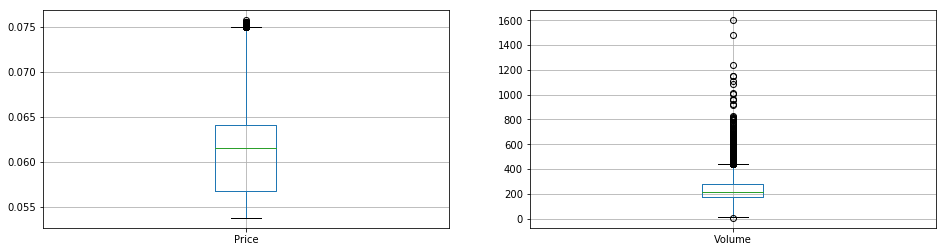

In [38]:
plt.figure(figsize=(16,4))
plt.subplot(121)
grouped.boxplot(column='Price')
plt.subplot(122)
grouped.boxplot(column='Volume')

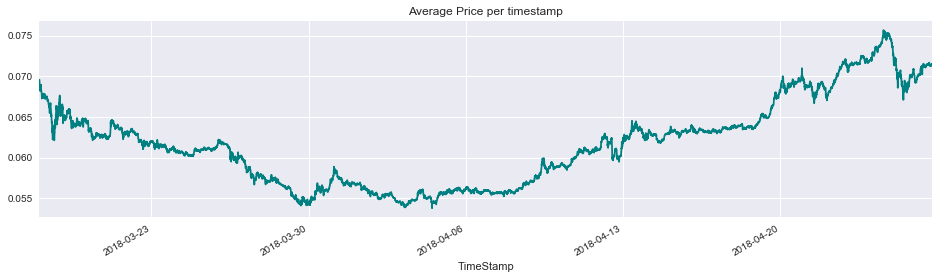

In [113]:
#average price per timestamp (as above) over the entire data time span 
grouped['Price'].plot(color='teal', figsize=(16,4), title="Average Price per timestamp")

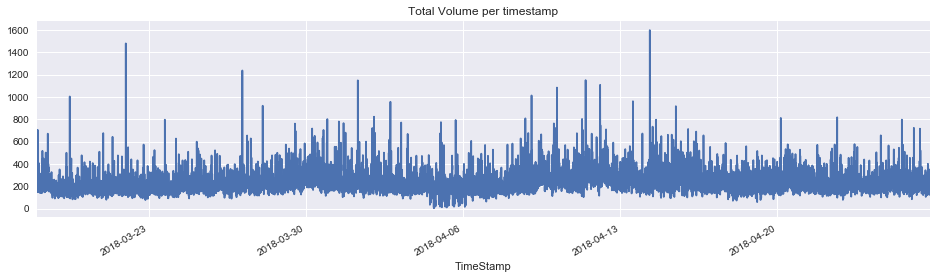

In [111]:
#total trade volume per timestamp
grouped['Volume'].plot(kind='line', figsize=(16,4), title="Total Volume per timestamp")

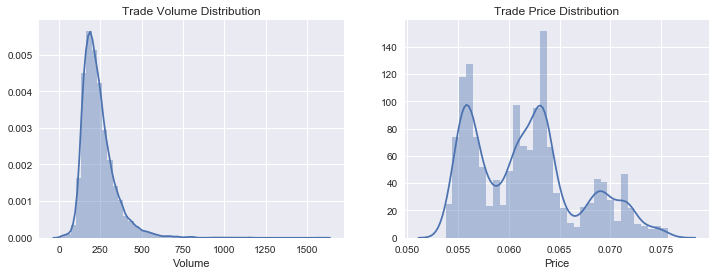

In [14]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title('Trade Volume Distribution')
sns.distplot(grouped.Volume) 
plt.subplot(122)
plt.title('Trade Price Distribution')
sns.distplot(grouped.Price) 

Note on the above graph: Volume has a normal distribution with the majority of the trades having volume of 100 to 250. The Price has a trimodal distribution making it lot trickier to predict.   

In [42]:
#each TimeStamp covers a period of 6 mins
print("Highest number of transactions in 6 mins: ", trades.groupby('TimeStamp').ID.count().max())
print("Lowest number of transactions in 6 mins: ", trades.groupby('TimeStamp').ID.count().min())

Highest number of transactions in 6 mins:  500
Lowest number of transactions in 6 mins:  232


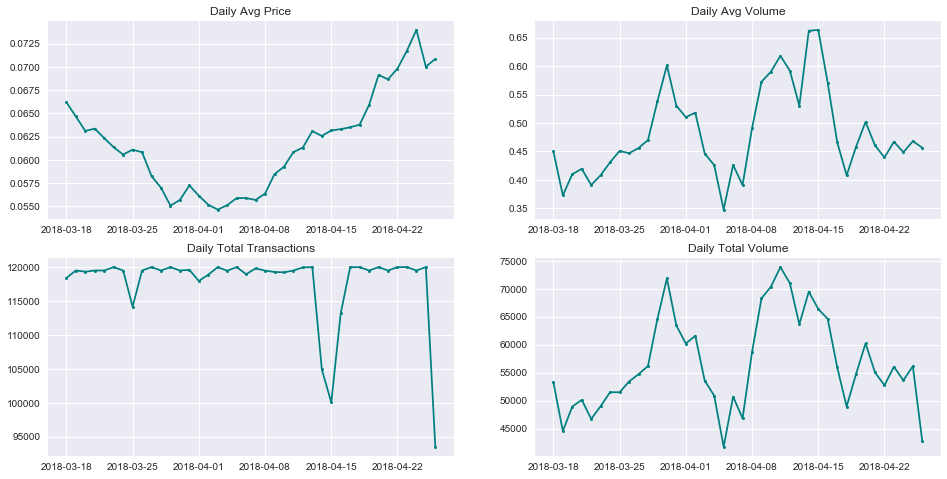

In [159]:
data2 = trades.reset_index(level=[1])
daily_avg = data2.resample('D').apply(np.mean) #Resample the data with daily frequency and calculate averag per column
plt.figure(figsize=(16,8))
plt.subplot(221)
plt.title('Daily Avg Price')
plt.plot(daily_avg.Price, "-o", markersize=3, color='teal')
plt.subplot(222)
plt.title('Daily Avg Volume')
plt.plot(daily_avg.Volume, "-o", markersize=3, color='teal')
plt.subplot(223)
daily_transactions = data2.resample('D').count()
plt.title('Daily Total Transactions')
plt.plot(daily_transactions.ID, "-o", markersize=3, color='teal')
plt.subplot(224)
daily_vol = data2.resample('D').sum()
plt.title('Daily Total Volume')
plt.plot(daily_vol.Volume, "-o", markersize=3, color='teal')

In [92]:
trades_exact = trades.set_index('ExactTimeStamp')

In [93]:
trades_per_sec = trades_exact.resample('s').count()

In [94]:
max_trans = trades_per_sec.max()
max_trans

TimeStamp    494
BuyType      494
Price        494
ID           494
Volume       494
dtype: int64

In [95]:
per_sec_data = trades_exact.resample('s').agg({'Price':np.mean, 'Volume':np.sum, 'BuyType':np.sum})

In [96]:
#Price mean, Volume total, BuyType total sales (where Ture), ID total trades
per_sec_data = per_sec_data.join(trades_per_sec['ID']) 

In [97]:
per_sec_data.dropna(axis=0, inplace=True)

In [98]:
#this is wrong, basically you have resampled by seconds therefore they have 
print("out of {0} sample, only {1} samples have trades recorded in them".format(per_sec_data.ID.sum(), per_sec_data.shape[0]))

out of 4710672 sample, only 1152505 samples have trades recorded in them


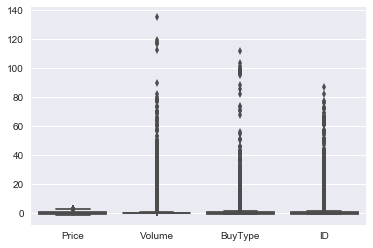

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

per_sec_scales = pd.DataFrame(scaler.fit_transform(per_sec_data), 
                              columns = per_sec_data.columns, 
                              index = per_sec_data.index)

sns.boxplot(per_sec_scales)

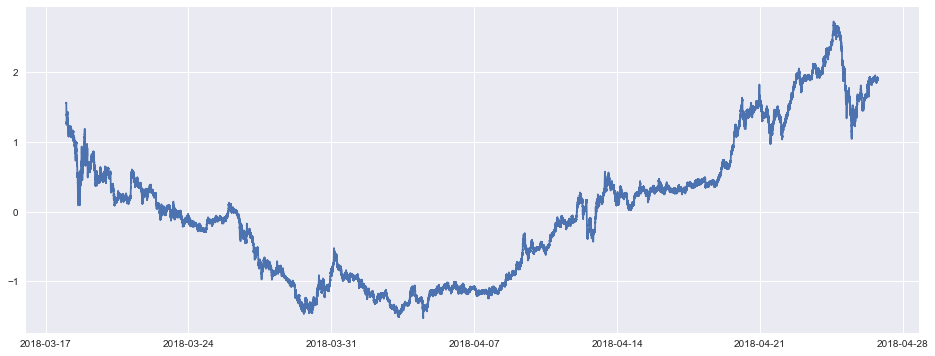

In [133]:
plt.figure(figsize=(16,6))
plt.plot(per_sec_scales.Price, label="Average Price")

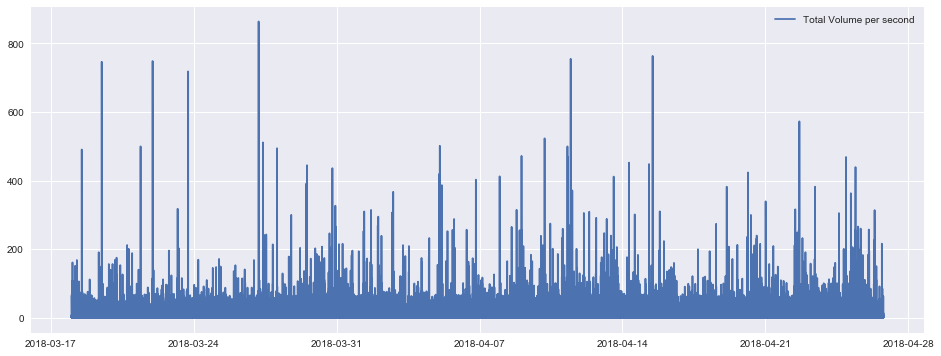

In [140]:
plt.figure(figsize=(16,6))
plt.plot(per_sec_data.Volume, label='Total Volume per second')
plt.legend()

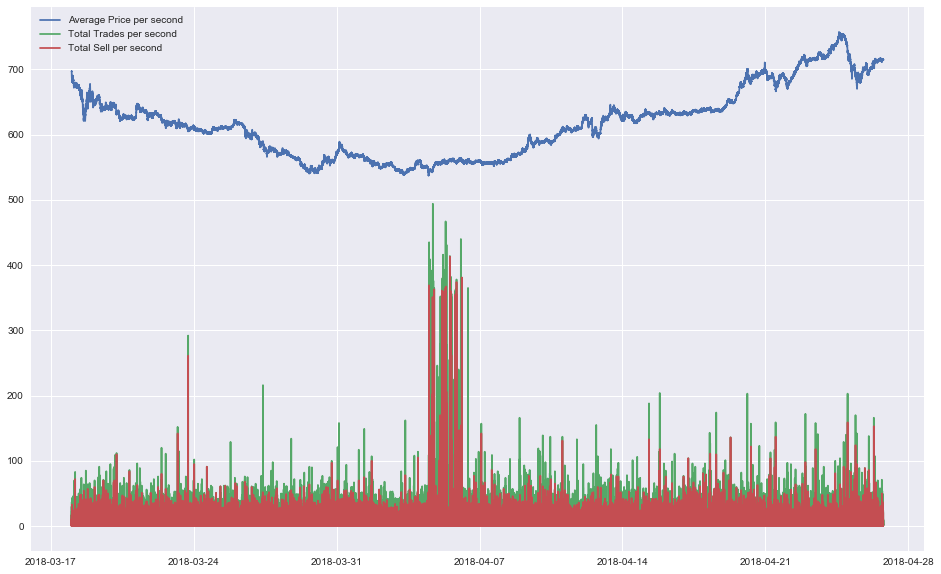

In [139]:
plt.figure(figsize=(16,10))
plt.plot(per_sec_data.Price*10000, label='Average Price per second')
plt.plot(per_sec_data.ID, label='Total Trades per second')
plt.plot(per_sec_data.BuyType, label='Total Sell per second')
plt.legend()

In [165]:
trades.reset_index(inplace=True)
trades['ExactTimeStamp'][-1:]

4710671   2018-04-26 18:42:24.185
Name: ExactTimeStamp, dtype: datetime64[ns]